# Extracción y Selección de Características
# Ejercicio<a class="tocSkip">
## Reconocimiento de Patrones <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**



# IMPORTANTE:

En este código por favor:

*   No agregar celdas nuevas
*   No agregar librerías nuevas
*   No usar otro nombre de variables
*   No cambiar el clasificador ni el número de vecinos del KNN
*   No hacer gráficas


<font color='red'>Esta tarea será corregida automáticamente, y si no se cumple alguna de las condiciones anteriores, es posible que la tarea no se corrija correctamente.</font>

Si quieres hacer modificaciones y probar estrategias distintas, te invito a hacerlo en otro código (no en éste). <font color='red'>Este código debe modificarse sólo en los lugares indicados.</font>

<font color='orange'> Evaluación:</font>
 Este ejercicio tiene n=20 ítems a evaluar, denotados como Q00, Q01, ... Qn a lo largo del notebook como `<Evaluación Qi>`. En tu evaluación (que recibirás en los próximos días) se indicará cómo han sido cada uno de estos n items. Tu nota en este ejercicio será el número de ítems correctamente hechos dividido por n multiplicado por 100 (en escala de 0 a 100%).


# Ejercicio 08: Estrategias para la Selección / Transformación de Características
----
ENTREGA: sábado 22/octubre/2022 a la 8:00 pm (se debe enviar al correo del profesor este archivo ipynb, <font color='red'>el nombre del archivo debe coincidir con tu número de alumno/a)</font>.

----
En este ejercicio se realizará la clasificación de género (mujeres/hombres) a partir de 1589 características extraídas de fotos faciales a color. Las características corresponden a texturas de Haralick y Gabor en los distintos espacios de color.

La base de datos contiene 436 muestras (218 por clase) y 1589 características por muestra. En este ejemplo, se usarán por cada clase las primeras 200 para training y las otras 18 para testing.

**ADVERTENCIA:** Este ejercicio tiene fines pedagógicos sólamente, con la idea de que la solución a este problema pueda ejecutarse en un par de minutos. Un buen reconocedor de género sigue esta idea pero con miles de muestras por clase.

A continuación, en cada PREGUNTA deberás ingresar alguna(s) líneas de código, o completar donde aparezca '<= COMPLETAR AQUI".




# Pregunta 0: Cambiar nombre de archivo

Este archivo debe llamarse `numero de alumnx.ipynb`, si tu número de alumno/a es '12345678J', este código debe llamarse `12345678J.ipynb`. La correción automática busca cada uno de estos archivos (según la lista de alumno/as inscrito/as), si tu código no es encontrado, no se ejecutará y te quedarás sin evaluación.


In [ ]:
print('Espero que hayas cambiado el nombre del archivo... :)')

Espero que hayas cambiado el nombre del archivo... :)


# Setup inicial

Liberías necesarias para que funcione el algoritmo.

In [1]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

try: 
  first_execution
  first_execution = 0
except:
  first_execution = 1

if first_execution:
  from IPython.display import clear_output
  !pip install passlib
  clear_output()
  print('Librerías instaladas.')

Librerías instaladas.


## Setup de librerías

In [2]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#
if first_execution:
  import numpy as np
  from   sklearn.metrics import confusion_matrix, accuracy_score
  from   sklearn.decomposition import FastICA
  from   sklearn.cross_decomposition import PLSRegression
  from   sklearn.neighbors import KNeighborsClassifier
  from   mlxtend.feature_selection import SequentialFeatureSelector as mlxsfs
  from   tqdm.auto import tqdm
  from   passlib.context import CryptContext
  from   requests import get
  import pickle
  !wget https://www.dropbox.com/s/e7c3c4w3rnza3h5/crypto_0.bin?dl=0
  crypt = CryptContext(
        schemes=["pbkdf2_sha256"],
        default="pbkdf2_sha256",
        pbkdf2_sha256__default_rounds=30000
  )
  with open("crypto_0.bin", "rb") as data:
    [idc_list] = pickle.load(data) 
  !rm crypto_0.bin
  clear_output()
  print('Librerías cargadas.')



Librerías cargadas.


## Funciones necesarias

In [4]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

def MatrixStats(X):
  p = np.zeros((6),'int')
  n = len(X.shape)
  if n>0:
    p[0] = X.shape[0]
    if n==2:
      p[1] = X.shape[1]
  p[2] = X.min()
  p[3] = X.max()
  p[4] = X.mean()
  p[5] = X.std()
  return p
  
def CheckMatrix(st,X,ps):
  p = MatrixStats(X)
  d = p-ps
  t = not(np.sum(d)==0)
  if t:
    print(st + ': Revisar, esta matriz presenta errores...')
  else:
    print(st + ': ok')
  return t

def CheckPrint(Y,st=True): 
  if np.sum(Y)>0:
    if st:
      print('Revisar, hay error en al menos uno de estos cálculos, no continuar con las siguientes celdas hasta no corregir este error.')
    else:
      print('Revisar, hay error en al menos uno de los datos personales (no coinciden con los ingresados en la PREGUNTA 0),')
      print('NO MOSTRAR LA TAREA ANTES DE CORREGIR ESTE ERROR.')
      print('(tu ejercicio corre el riesgo de no ser corregido)')
  else:
    if st:
      print('Felicitaciones! Los cálculos han sido realizados correctamente.')
    else:
      print('Felicitaciones! Los datos coinciden con los ingresados en la Pregunta 0.')


chk = [[ 289,    0,    0, 1513,  811,  456],[  400,   289,    -3, 57793,   178,  1314],[  36,  289,   -2, 6710,  113,  635],[400, 289,   0, 100,  53,  26],[ 36, 289, -40, 265,  53,  23],[400,  30,   0, 100,  51,  25],[ 36,  30,  -2, 191,  53,  22],[ 400,   15, -132,  179,    0,   29],[ 36,  15, -99,  86,   0,  24],[400,  10, -21,  22,   0,   5],[ 36,  10, -14,  18,   0,   4],[ 400,   10, -815,  483,    0,  139],[  36,   10, -397,  609,   29,  138],[ 400,    6, -815,  483,    0,  150],[  36,    6, -397,  478,   23,  155],[ 400,    6, -815,  483,    0,  150],[  36,    6, -377,  478,   21,  151]]

# Separación entre training y testing
def SplitTrainTest(X,y,n):

  K      = np.max(y)+1              # número de clases
  N      = int(X.shape[0]/K)        # numeros de muestras por clase
  Ntrain = n*K                      # número de muestras para el training
  Ntest  = K*N-Ntrain               # número de muestras para el testing
  M      = X.shape[1]               # número de características por muestra
  Xtrain = np.zeros((Ntrain,M))     # subset de training
  ytrain = np.zeros((Ntrain),'int') # ground truth del training         
  Xtest  = np.zeros((Ntest,M))      # subset de testing
  ytest  = np.zeros((Ntest),'int')  # ground truth del testing  

  # contadores
  itrain = 0
  itest  = 0
  t      = 0

  for j in range(K):     # para cada clase
    for i in range(N):   # para cada imagen de la clase
      if i<n: # training
        Xtrain[itrain,:] = X[t,:]
        ytrain[itrain] = y[t]
        itrain = itrain+1
      else:  # testing
        Xtest[itest,:] = X[t,:]
        ytest[itest] = y[t]
        itest = itest+1
      t = t+1

  return Xtrain,ytrain,Xtest,ytest

# Clasificación usando KNN
def ClassifierKNN(Xtrain,ytrain,Xtest,ytest,n_neighbors=1,normalize=True,echo=True):
  if normalize:
    Xtrain, a, b = minmax(Xtrain)
    Xtest        = Xtest * a + b
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(Xtrain, ytrain)
  ypred        = knn.predict(Xtest)
  acc          = accuracy_score(ytest,ypred)
  C = confusion_matrix(ytest,ypred)
  if echo:
    print('Training with '+str(Xtrain.shape[0])+' samples. Testing with '+str(Xtest.shape[0])+' samples (of '+str(Xtrain.shape[1])+ ' features)...')
    print('Testing Accuracy = '+str(acc*100)+'%')
    print('Confusion Matrix:')
    print(C)
  return acc,C

def score(features, ypred, *, method='fisher', param=None):
  if param is None:
    dn = ypred.max() - ypred.min() + 1  # number of classes
    p = np.ones((dn, 1)) / dn
  else:
    p = param

  if method == 'mi':  # mutual information
    raise NotImplementedError()

  # maximal relevance
  elif method == 'mr':
    raise NotImplementedError()

  # minimal redundancy and maximal relevance
  elif method == 'mrmr':
    raise NotImplementedError()

  # fisher
  elif method == 'fisher':
    return jfisher(features, ypred, p)

  elif method == 'sp100':
    return sp100(features, ypred)

  else:
    return 0

def clean(features, show=False):
  n_features = features.shape[1]
  ip = np.ones(n_features, dtype=int)

  # cleaning correlated features
  warnings.filterwarnings('ignore')
  C = np.abs(np.corrcoef(features, rowvar=False))
  idxs = np.vstack(np.where(C > .99))

  # remove pairs of same feature ( feature i will have a correlation of 1 whit itself )
  idxs = idxs[:, idxs[0,:] != idxs[1,:]]

  # remove correlated features
  if idxs.size > 0:
    ip[np.max(idxs, 0)] = 0

  # remove constant features
  s = features.std(axis=0, ddof=1)
  ip[s < 1e-8] = 0
  p = np.where(ip.astype(bool))[0]

  if show:
    print(f'Clean: number of features reduced from {n_features} to {p.size}.')

  return p

def jfisher(features, ypred, p=None):
  m = features.shape[1]

  norm = ypred.ravel() - ypred.min()
  max_class = norm.max() + 1

  if p is None:
    p = np.ones(shape=(max_class, 1)) / max_class

  # Centroid of all samples
  features_mean = features.mean(0)

  # covariance within class 
  cov_w = np.zeros(shape=(m, m))

  # covariance between classes
  cov_b = np.zeros(shape=(m, m))

  for k in range(max_class):
    ii = (norm == k)                                   # indices from class k
    class_features = features[ii,:]                    # samples of class k
    class_mean = class_features.mean(0)                # centroid of class k 
    class_cov = np.cov(class_features, rowvar=False)   # covariance of class k

    cov_w += p[k] * class_cov                          # within-class covariance

    dif = (class_mean - features_mean).reshape((m, 1))
    cov_b += p[k] * dif @ dif.T                        # between-class covariance
  try:
    return np.trace(np.linalg.inv(cov_w) @ cov_b)
  except np.linalg.LinAlgError:
    return - np.inf

def normalize(X):
  mf = X.mean(0)
  sf = X.std(0)
  a = 1 / sf
  b = - mf / sf
  return X * a + b, a, b

def sfs(features, ypred, n_features, *, force=False, method='fisher', options=None, show=False):

  N, M = features.shape
  remaining_feats = set(np.arange(M))
  selected = list()
  curr_feats = np.zeros((N, 0))
  if options is None:
    options = dict()

  def _calc_score(i):
    feats = np.hstack([curr_feats, features[:, i].reshape(-1, 1)])
    return score(feats, ypred, method=method, **options)

  if show:
    _range = tqdm.trange(
      n_features, desc='Selecting Features', unit_scale=True, unit=' features')
  else:
    _range = range(n_features)

  for _ in _range:
    new_selected = max(remaining_feats, key=_calc_score)
    selected.append(new_selected)
    remaining_feats.remove(new_selected)
    curr_feats = np.hstack(
      [curr_feats, features[:, new_selected].reshape(-1, 1)])

  return np.array(selected)

def choose(n, k):
  return int(np.math.factorial(n) / (np.math.factorial(n - k) * np.math.factorial(k)))

def exsearch(features, ypred, n_features, *, method='fisher', options=None, show=False):
  if options is None:
    options = dict()

  tot_feats = features.shape[1]
  N = choose(tot_feats, n_features)

  if N > 10000:
    warnings.warn(
      f'Doing more than 10.000 iterations ({N}). This may take a while...')

  def _calc_score(ii):
    feats = features[:, ii]
    return score(feats, ypred, method=method, **options)

  _combinations = combinations(range(tot_feats), n_features)

  if show:
    _combinations = zip(tqdm.trange(N,
                                    desc='Combinations checked',
                                    unit_scale=True,
                                    unit=' combinations'),
                        _combinations)

    _combinations = (ii for _, ii in _combinations)

  chosen_feats = max(_combinations, key=_calc_score)

  return np.array(chosen_feats)

def hugeo(R,names=False):
  # regionprops
  # https://scikit-image.org/docs/stable/api/skimage.measure.html#regionprops
  props = skimage.measure.regionprops(R)[0]

  X = props.moments_hu

  if names:
    Xn = ['Hu-moment-1','Hu-moment-2','Hu-moment-3','Hu-moment-4','Hu-moment-5','Hu-moment-6','Hu-moment-7']
    return X,Xn
  else:
    return X

def flusser(R,names=False):
  moments = cv2.moments(R, True)
  u00,u20, u11, u02, u30, u21, u12, u03 = moments['m00'], moments['mu20'], moments['mu11'], moments['mu02'], moments['mu30'], moments['mu21'], moments['mu12'], moments['mu03']
  I1 = (u20*u02-u11**2)/u00**4 ;
  I2 = (u30**2*u03**2-6*u30*u21*u12*u03+4*u30*u12**3+4*u21**3*u03-3*u21**2*u12**2)/u00**10;
  I3 = (u20*(u21*u03-u12**2)-u11*(u30*u03-u21*u12)+u02*(u30*u12-u21**2))/u00**7;
  I4 = (u20**3*u03**2-6*u20**2*u11*u12*u03-6*u20**2*u02*u21*u03+9*u20**2*u02*u12**2 + 12*u20*u11**2*u21*u03+6*u20*u11*u02*u30*u03-18*u20*u11*u02*u21*u12-8*u11**3*u30*u03- 6*u20*u02**2*u30*u12+9*u20*u02**2*u21+12*u11**2*u02*u30*u12-6*u11*u02**2*u30*u21+u02**3*u30**2)/u00**11;
  X = [I1,I2,I3,I4]
  if names:
    Xn = ['Flusser-1','Flusser-2','Flusser-3','Flusser-4']
    return X,Xn
  else:
    return X



def efd_descriptors(contour, order=10, normalize=True):
  # From https://github.com/hbldh/pyefd

  """Calculate elliptical Fourier descriptors for a contour.
  :param numpy.ndarray contour: A contour array of size ``[M x 2]``.
  :param int order: The order of Fourier coefficients to calculate.
  :param bool normalize: If the coefficients should be normalized;
      see references for details.
  :param bool return_transformation: If the normalization parametres should be returned.
      Default is ``False``.
  :return: A ``[order x 4]`` array of Fourier coefficients and optionally the
      transformation parametres ``scale``, ``psi_1`` (rotation) and ``theta_1`` (phase)
  :rtype: ::py:class:`numpy.ndarray` or (:py:class:`numpy.ndarray`, (float, float, float))
  """
  dxy = np.diff(contour, axis=1)
  dxy = dxy.reshape(dxy.shape[1],2)
  dt = np.sqrt((dxy ** 2).sum(axis=1))
  t = np.concatenate([([0.0]), np.cumsum(dt)])
  T = t[-1]

  phi = (2 * np.pi * t) / T

  orders = np.arange(1, order + 1)
  consts = T / (2 * orders * orders * np.pi * np.pi)
  phi = phi * orders.reshape((order, -1))

  d_cos_phi = np.cos(phi[:, 1:]) - np.cos(phi[:, :-1])
  d_sin_phi = np.sin(phi[:, 1:]) - np.sin(phi[:, :-1])

  a = consts * np.sum((dxy[:, 0] / dt) * d_cos_phi, axis=1)
  b = consts * np.sum((dxy[:, 0] / dt) * d_sin_phi, axis=1)
  c = consts * np.sum((dxy[:, 1] / dt) * d_cos_phi, axis=1)
  d = consts * np.sum((dxy[:, 1] / dt) * d_sin_phi, axis=1)

  coeffs = np.concatenate(
    [
      a.reshape((order, 1)),
      b.reshape((order, 1)),
      c.reshape((order, 1)),
      d.reshape((order, 1)),
    ],
    axis=1,
  )

  if normalize:
    theta_1 = 0.5 * np.arctan2(
      2 * ((coeffs[0, 0] * coeffs[0, 1]) + (coeffs[0, 2] * coeffs[0, 3])),
      (
              (coeffs[0, 0] ** 2)
              - (coeffs[0, 1] ** 2)
              + (coeffs[0, 2] ** 2)
              - (coeffs[0, 3] ** 2)
      ),
    )
    # Rotate all coefficients by theta_1.
    for n in range(1, coeffs.shape[0] + 1):
      coeffs[n - 1, :] = np.dot(
        np.array(
          [
            [coeffs[n - 1, 0], coeffs[n - 1, 1]],
            [coeffs[n - 1, 2], coeffs[n - 1, 3]],
          ]
        ),
        np.array(
          [
            [np.cos(n * theta_1), -np.sin(n * theta_1)],
            [np.sin(n * theta_1), np.cos(n * theta_1)],
          ]
        ),
      ).flatten()

    # Make the coefficients rotation invariant by rotating so that
    # the semi-major axis is parallel to the x-axis.
    psi_1 = np.arctan2(coeffs[0, 2], coeffs[0, 0])
    psi_rotation_matrix = np.array(
      [[np.cos(psi_1), np.sin(psi_1)], [-np.sin(psi_1), np.cos(psi_1)]]
    )
    # Rotate all coefficients by -psi_1.
    for n in range(1, coeffs.shape[0] + 1):
      coeffs[n - 1, :] = psi_rotation_matrix.dot(
        np.array(
          [
            [coeffs[n - 1, 0], coeffs[n - 1, 1]],
            [coeffs[n - 1, 2], coeffs[n - 1, 3]],
          ]
        )
      ).flatten()

    size = coeffs[0, 0]
    # Obtain size-invariance by normalizing.
    coeffs /= np.abs(size)
  X = coeffs.reshape(4*order,)

  return X

def efourierdes(R, order=10, names=False):
  # Elliptic Fourier Descriptors from https://github.com/hbldh/pyefd
  R8h    = binary_fill_holes(R).astype(np.uint8)
  contours, hierarchy = cv2.findContours(R8h, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  X = efd_descriptors(contours, order=order)

  if names==True:
    Xn = []
    for k in range(order):
      Xn.append('Fourierdes-a-'+str(k))
      Xn.append('Fourierdes-b-'+str(k))
      Xn.append('Fourierdes-c-'+str(k))
      Xn.append('Fourierdes-d-'+str(k))
    return X,Xn
  else:
    return X

from   skimage.segmentation import find_boundaries
from   scipy.ndimage import binary_fill_holes


def fourierdes(R, n_des=16, names=False):

  R8h    = binary_fill_holes(R).astype(np.uint8)
  contour, hierarchy = cv2.findContours(R8h, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  x = np.array(contour)
  B = x.reshape(x.shape[1],2)
  V = B[:, 0] + 1j * B[:, 1]
  m = B.shape[0]

  r = np.zeros(m, dtype=complex)
  phi = np.zeros(m)
  dphi = np.zeros(m)
  l = np.zeros(m)
  dl = np.zeros(m)

  r[0] = V[0] - V[m-1]
  r[1:] = V[1:] - V[:m-1]

  dl = np.abs(r)
  phi = np.angle(r)

  dphi[:m-1] = np.mod(phi[1:] - phi[:m-1] + np.pi, 2 * np.pi) - np.pi
  dphi[m-1] = np.mod(phi[0] - phi[m-1] + np.pi, 2 * np.pi) - np.pi

  l[0] = dl[0]
  for k in range(1, m):
    l[k] = l[k-1] + dl[k]

  l = l * (2 * np.pi / l[m-1])
  descriptors = np.zeros(n_des)

  for n in range(1, n_des + 1):
    an = (dphi * np.sin(l * n)).sum()
    bn = (dphi * np.cos(l * n)).sum()
    an = -an / n / np.pi
    bn = bn / n / np.pi
    imagi = an + 1j * bn
    descriptors[n-1] = np.abs(imagi)

  X = descriptors

  if names:
    return np.array([f'Fourier-des {n+1:>2d}' for n in range(n_des)]), descriptors
  return X

def fit_ellipse(x,y):
  # Fitzgibbon, A.W., Pilu, M., and Fischer R.B., 
  # Direct least squares fitting of ellipses, 1996
  x        = x[:,None]
  y        = y[:,None]
  D        = np.hstack([x*x,x*y,y*y,x,y,np.ones(x.shape)])
  S        = np.dot(D.T,D)
  C        = np.zeros([6,6])
  C[0,2]   = C[2,0] = 2
  C[1,1]   = -1
  E,V      = np.linalg.eig(np.dot(np.linalg.inv(S),C))
  n        = np.argmax(E)
  s        = V[:,n]
  a        = s[0]
  b        = s[1]/2.
  c        = s[2]
  d        = s[3]/2.
  f        = s[4]/2.
  g        = s[5]
  dd       = b*b-a*c
  cx       = (c*d-b*f)/dd
  cy       = (a*f-b*d)/dd
  alpha    = 0.5*np.arctan(2*b/(a-c))*180/np.pi
  up       = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
  down1    = (b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
  down2    = (b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
  a        = np.sqrt(abs(up/down1))
  b        = np.sqrt(abs(up/down2))
  area     = np.pi*a*b

  if b>a:
    ecc  = a/b
  else:
    ecc  = b/a

  features = [cx,cy,a,b,alpha,ecc,area]

  return features

def fitellipse(R,names=False):
  E        = find_boundaries(R, mode='outer').astype(np.uint8)
  # E        = bwperim(R)
  data     = np.argwhere(E==True)
  y        = data[:,0]
  x        = data[:,1]
  X       = fit_ellipse(x,y)
  if names:
    Xn = ['cx','cy','a','b','alpha','ecc','area']
    return X,Xn
  else:
    return X
  return features

def gupta(R, names=False):

  B = skimage.segmentation.find_boundaries(R,mode='inner')
  i_perim, j_perim = np.where(B.astype(bool))
  im_perim = i_perim + j_perim * 1j
  ix = i_perim.mean()
  jx = j_perim.mean()
  centre = ix + jx * 1j
  z = np.abs(im_perim - centre)
  m1 = z.mean()

  mur1 = z - m1
  mur2 = mur1 * mur1
  mur3 = mur1 * mur2
  mur4 = mur2 * mur2

  mu2 = mur2.mean()
  mu3 = mur3.mean()
  mu4 = mur4.mean()

  F1 = (mu2 ** .5) / m1
  F2 = mu3 / (mu2 * (mu2 ** .5))
  F3 = mu4 / mu2 ** 2

  X = np.array([F1, F2, F3])

  if names:
    Xn = ['Gupta-1','Gupta-2','Gupta-3']
    return X,Xn
  else:
    return X

# Normalización MinMax: cada columna es normalizada para que tenga minimo 0 y máximo 1
def minmax(X):
    ma = X.max(0)
    mi = X.min(0)
    md    = ma-mi    
    a     = 1/ md
    b     = -mi/md
    return X * a + b, a, b

def file_verify(idt):
  k = -1
  idt_file = idt+'.ipynb'
  my_filename = get('http://172.28.0.2:9000/api/sessions').json()[0]['name']
  if idt_file==my_filename:
    print('Bien! nombre de archivo coincide con tu número de alumnx.')
    k = 0
  else:
    print('ADVERTENCIA: El nombre de archivo de este código no coincide con la variable NumeroID (número de alumnx). Esta tarea no podrá ser corregida.')
    print('Nombre de archivo: '+my_filename)
    print('  Nombre esperado: '+idt_file)

  return k

def id_verify(idt,idc_list):
  ok = False
  idt = idt.upper()
  k = -1
  n = len(idc_list)
  for i in range(n):
    oki = crypt.verify(idt,idc_list[i])
    ok = ok or oki
    if oki:
      k = i
  if k==-1:
    print('ADVERTENCIA: Este ID no se encuentra registrado, contacte al profesor del curso.')
  else:
    print('Bien! ID '+idt+' registrado en la lista del curso.')
  return k

def verify(idt):
  kID   = id_verify(NumeroID,idc_list)
  kFile = file_verify(NumeroID)
  if kID == -1 or kFile == -1:
    k = 1
  else:
    k = 0
  return k

def num2fixstr(x,d):
  # example num2fixstr(2,5) returns '00002'
  # example num2fixstr(19,3) returns '019'
  st = '%0*d' % (d,x)
  return st


def FinalCheck(T):
  n = len(T)
  for i in range(n):
    if T[i]==1:
      print('Error: El código presenta error en la evaluación de Q'+num2fixstr(i,2))
  if sum(T)>0:
    print('Este código presenta errores. Es recomendable revisarlo antes de mostrar al profesor.')
  else:
    print('FELICITACIONES!!! El código no presenta errores. Puedes mostrarlo al profesor.')

print('Funciones necesarias ejecutadas.')

Funciones necesarias ejecutadas.


# PREGUNTA 0: Datos personales

Ingresa tus datos para poder evaluarte, 
<font color='red'>si tus datos son incorrectos, este ejercicio no podrá ser corregido y por lo tanto no tendrás nota en esta actividad.</font>

In [2]:
NumeroID         = '12345678K'   # <= COMPLETAR AQUI NUMERO DE ALUMNO/A ENTRE APOSTROFES
PrimerNombre     = 'José'   # <= COMPLETAR AQUI TU PRIMER NOMBRE
PrimerApellido   = 'Iglesias'   # <= COMPLETAR AQUI TU PRIMER APELLIDO
Correo           = 'joseiglesias@unicesar.edu.co'   # <= COMPLETAR AQUI TU CORREO ELECTRONICO

stid             = PrimerNombre+' '+PrimerApellido+' (ID:'+NumeroID+', email:'+Correo+'):'
print('Registro: '+stid)


Registro: José Iglesias (ID:12345678K, email:joseiglesias@unicesar.edu.co):


In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR EL INGRESO DE DATOS PERSONALES
#

T = np.ones((20),'int')
T[0] = verify(NumeroID) # <Evaluación Q00>


Bien! ID 12345678K registrado en la lista del curso.
ADVERTENCIA: El nombre de archivo de este código no coincide con la variable NumeroID (número de alumnx). Esta tarea no podrá ser corregida.
Nombre de archivo: Numero_Alumnx_Eje08.ipynb
  Nombre esperado: 12345678K.ipynb


# Carga de base de datos

La base de datos consiste en 2 clases con 218 muestras por clase. Las 1589 características por muestras se encuentran almacenadas en el archivo `X_gender.npy` como una matriz de 436 x 1589 elementos. Los labels se encuentren almacenados en el archivo `y_gender` como un vector de 436 eelementos (218 ceros y 218 unos).

In [ ]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

if first_execution:
  !wget https://www.dropbox.com/s/kuykz2cctcfdhc0/X_gender.npy?dl=0
  !wget https://www.dropbox.com/s/jlxitl2a0tb939k/y_gender.npy?dl=0
  clear_output()
  print('Base de datos cargada.')

Base de datos cargada.


Los datos cargados se almacenan en la matriz `X` de 436x1589 elementos y en el vector `y` de 436 elementos:

In [ ]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

X = np.load('X_gender.npy')
y = np.load('y_gender.npy')
print('Características X: '+ str(X.shape)+ ' elementos.')
print('         Labels y: '+ str(y.shape)+ ' elementos.')


Características X: (436, 1589) elementos.
         Labels y: (436, 1) elementos.


# Definición de Training y Testing

En todos los experimentos usaremos 200 muestras por clase para training y el resto (18) para testing. Para la separación train/test usaremos la función `SplitTrainTest`.

In [ ]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

ntrain = 200
Xtrain,ytrain,Xtest,ytest = SplitTrainTest(X,y,ntrain)
print('muestras x características:')
print('Training: '+ str(Xtrain.shape))
print(' Testing: '+ str(Xtest.shape))


muestras x características:
Training: (400, 1589)
 Testing: (36, 1589)


# Clasificación con los datos originales (sin selección)

Para la clasificación usaremos siempre en todo el ejercicio la función `ClassifierKNN` con 5 vecinos (valor por defecto en este código).


In [ ]:
#
# EJECUTAR ESTA CELDA SIN MODIFICARLA
#

acc,C = ClassifierKNN(Xtrain,ytrain,Xtest,ytest)

Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 1589 features
Testing Accuracy = 52.78%

Matriz de Confusión:
[[11  7]
 [10  8]]


# ESTRATEGIA DEL EJERCICIO

En este ejercicio se seguirá la estrategia mostrada en este diagrama. Por simplificación, se muestra solo el nombre de las variables de training (obviamente en paralelo van los bloques del testing). En azul se indica el número de características (columnas) de cada variable. Cada bloque, numerado como 'Pj', es definido en la 'Pregunta j' del ejercicio.

ADVERTENCIA: Esta estrategia tiene sólo fines pedagógicos, probablemente una estrategia mucho más simple obtendría resultados similares.

<font color='orange'>Un ejemplo del uso de cada uno de estos bloques se encuentra en el Colab del ejemplo anterior. Para realizar este ejercicio se recomienda tener el ejemplo anterior abierto en otra ventana o pestaña. </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]

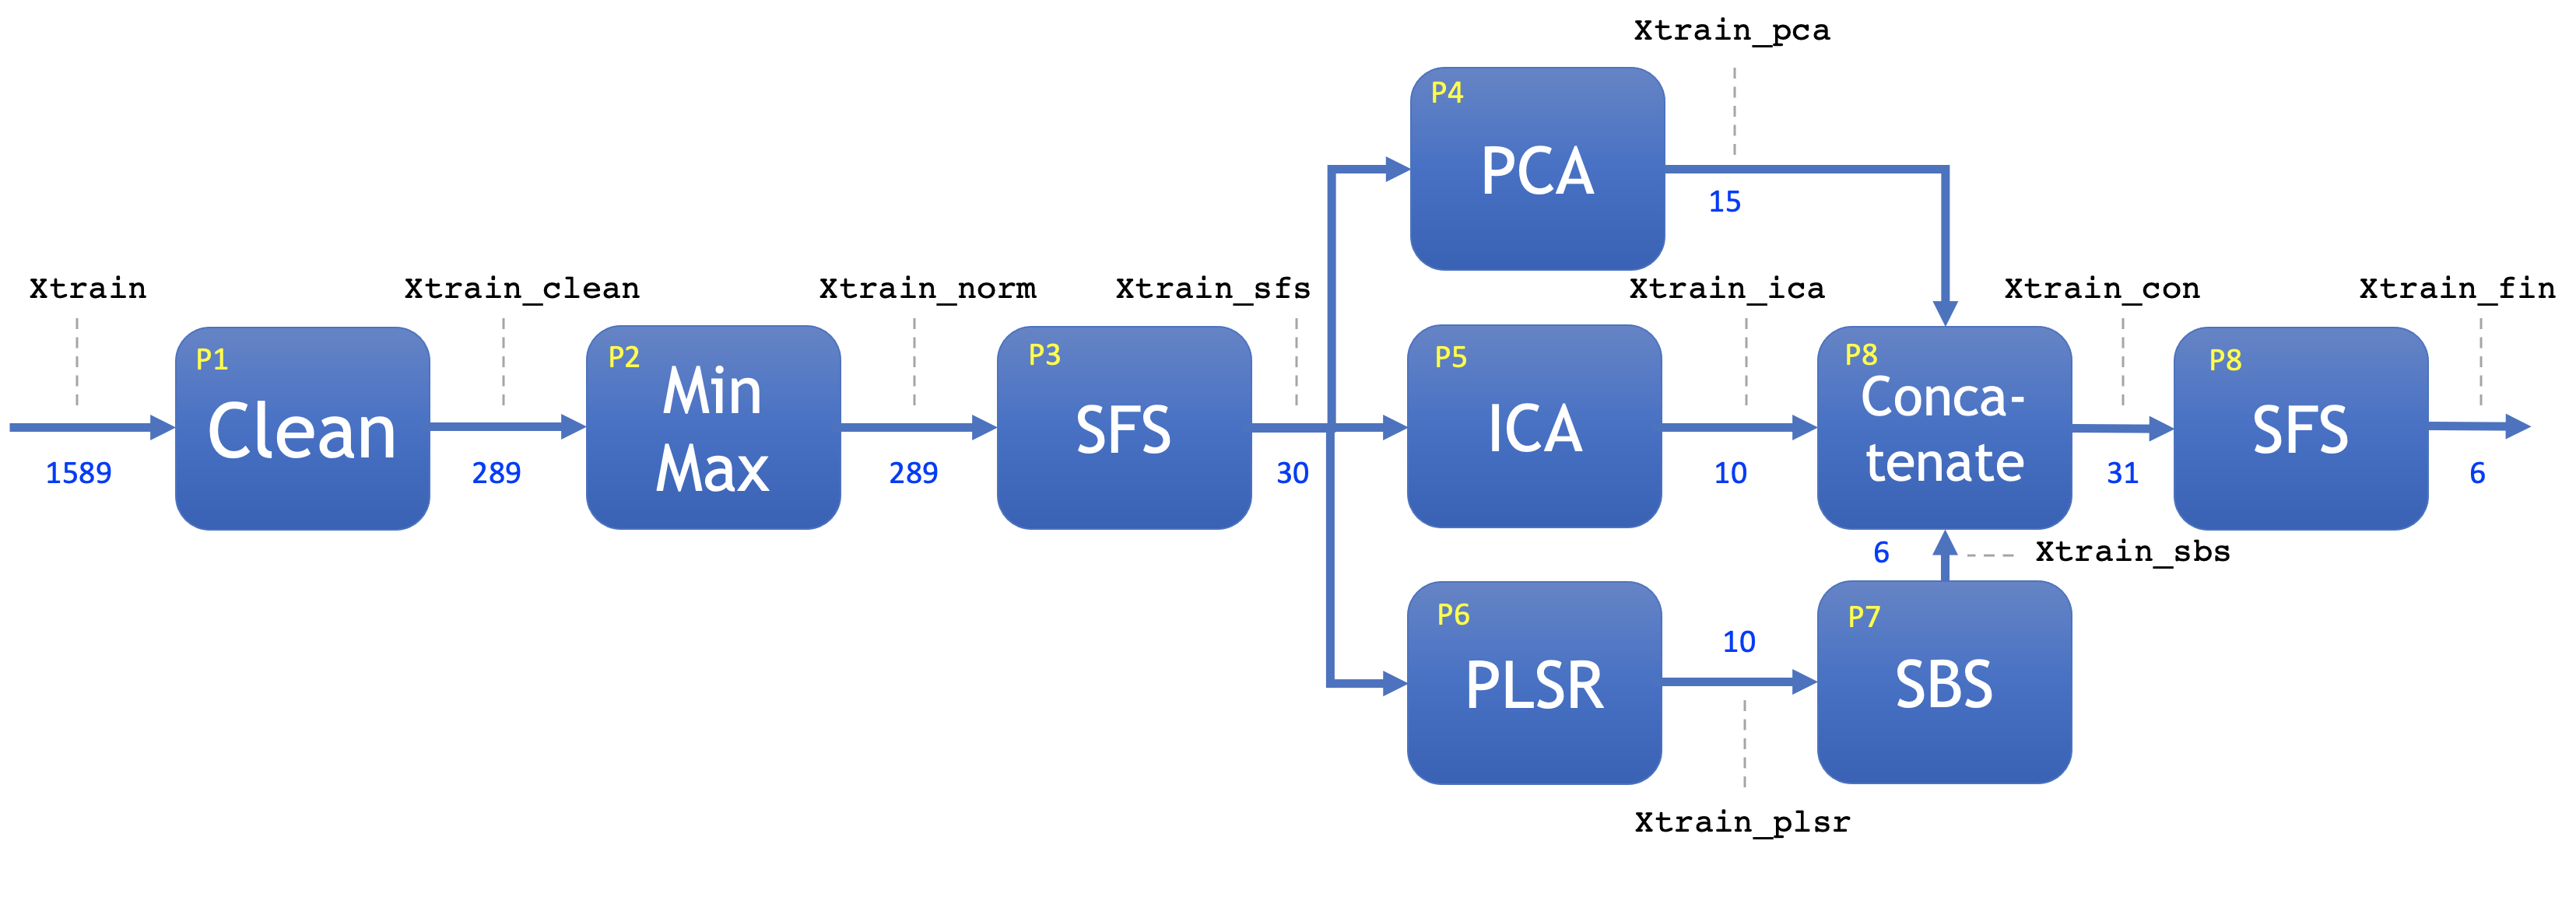

# Pregunta 1: Clean

Como primer experimento seleccionaremos las características con `clean`.

<font color='orange'>Si tienes dudas de cómo se usa la función `clean' te recomiendo ver la sección "Pasos iniciales (sin selección)" del ejemplo anterior visto en clases: </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]





In [ ]:
# En ese código:
#    INPUT: Xtrain,Xtest
#    OUTPUT: Xtrain_clean,Xtest_clean

sclean       = clean(Xtrain)   # <= COMPLETAR AQUI índice de características seleccionadas
Xtrain_clean = Xtrain[:,sclean]   # <= COMPLETAR AQUI datos de training "limpios"
Xtest_clean  = Xtest[:,sclean]   # <= COMPLETAR AQUI datos de testing "limpios"

print('Seleccionadas '+str(len(sclean))+' de '+str(X.shape[1])+' características')
acc,C = ClassifierKNN(Xtrain_clean,ytrain,Xtest_clean,ytest)


Seleccionadas 289 de 1589 características
Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 289 features
Testing Accuracy = 55.56%

Matriz de Confusión:
[[16  2]
 [14  4]]


In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[1]  = CheckMatrix('      sclean',sclean,chk[0])        # <Evaluación Q01>
T[2]  = CheckMatrix('Xtrain_clean',Xtrain_clean,chk[1])  # <Evaluación Q02>
T[3]  = CheckMatrix(' Xtest_clean',Xtest_clean,chk[2])   # <Evaluación Q03>
CheckPrint(T[1:4])

      sclean: ok
Xtrain_clean: ok
 Xtest_clean: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# Pregunta 2: Normalización MinMax

Ahora usaremos la normalización `minmax`. Usa este ejemplo en el que se muestra como se normalizan los datos de training (`Ztraining`) y testing (`Ztesting`):

`Ztraining_norm, a, b = minmax(Ztraining)`

`Ztesting_norm        = Ztesting * a + b`

<font color='orange'>Si tienes dudas de cómo se usa la función `minmax' te recomiendo ver la sección "Pasos iniciales (sin selección)" del ejemplo anterior visto en clases: </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]





In [ ]:
# En ese código:
#    INPUT: Xtrain_clean,Xtest_clean
#    OUTPUT: Xtrain_norm,Xtest_norm

Xtrain_norm, a, b = minmax(Xtrain_clean) # <= COMPLETAR AQUI normalización minmax de Xtrain_clean
Xtest_norm        = Xtest_clean*a+b # <= COMPLETAR AQUI normalización para X_test_clean

acc,C = ClassifierKNN(Xtrain_norm,ytrain,Xtest_norm,ytest)


Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 289 features
Testing Accuracy = 72.22%

Matriz de Confusión:
[[12  6]
 [ 4 14]]


In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[4]  = CheckMatrix('Xtrain_norm',Xtrain_norm*100,chk[3])  # <Evaluación Q04>
T[5]  = CheckMatrix(' Xtest_norm',Xtest_norm*100,chk[4])   # <Evaluación Q05>
CheckPrint(T[5:6])

Xtrain_norm: ok
 Xtest_norm: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# Pregunta 3: Selección con SFS

A continuación realiza la selección de características usando `sfs` para seleccionar 30 características de `Xtrain_norm`.

<font color='orange'>Si tienes dudas de cómo se usa esta función te recomiendo ver la sección "SFS" del ejemplo anterior visto en clases: </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]

In [ ]:
# En ese código:
#    INPUT: Xtrain_norm, Xtest_norm
#    OUTPUT: Xtrain_sfs,Xtest_sfs

sel = sfs(Xtrain_norm,ytrain,30,show=True)        # <= COMPLETAR AQUI  los índices de 30 características seleccionadas con sfs de Xtrain_norm
Xtrain_sfs = Xtrain_norm[:,sel] # <= COMPLETAR AQUI las 30 columnas seccionadas de Xtrain_norm
Xtest_sfs  = Xtest_norm[:,sel] # <= COMPLETAR AQUI las 30 columnas seccionadas de Xtest_norm
acc,C = ClassifierKNN(Xtrain_sfs,ytrain,Xtest_sfs,ytest)


Selecting Features: 100%|██████████| 30.0/30.0 [00:07<00:00, 4.25 features/s]

Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 30 features
Testing Accuracy = 83.33%

Matriz de Confusión:
[[12  6]
 [ 0 18]]


In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[6]  = CheckMatrix('Xtrain_sfs',Xtrain_sfs*100,chk[5])  # <Evaluación Q06>
T[7]  = CheckMatrix(' Xtest_sfs',Xtest_sfs*100,chk[6])   # <Evaluación Q07>
CheckPrint(T[7:8])

Xtrain_sfs: ok
 Xtest_sfs: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# Pregunta 4: Transformación con PCA

A continuación realiza la transformación de características usando `pca` de `PyBalu` para quedaron con primeros 15 componentes de `Xtrain_sfs`.

<font color='orange'>Si tienes dudas de cómo se usa esta función te recomiendo ver la sección "PCA" del ejemplo anterior visto en clases: </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]

In [ ]:
# En ese código:
#    INPUT: Xtrain_sfs, Xtest_sfs
#    OUTPUT: Xtrain_pca,Xtest_pca

Xtrain_pca, _, A, Xm, _ = pca(Xtrain_sfs,n_components=15)   # <= COMPLETAR AQUI las 5 componentes principales de PCA de Xtrain_sfs
Xtest_pca =             np.matmul(Xtest_sfs-Xm,A)   # <= COMPLETAR AQUI la transformación lineal de Xtest_sfs usando el PCA calculado

acc,C = ClassifierKNN(Xtrain_pca,ytrain,Xtest_pca,ytest,1)

Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 15 features
Testing Accuracy = 91.67%

Matriz de Confusión:
[[15  3]
 [ 0 18]]


In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[8]  = CheckMatrix('Xtrain_pca',Xtrain_pca*100,chk[7])  # <Evaluación Q08>
T[9]  = CheckMatrix(' Xtest_pca',Xtest_pca*100,chk[8])   # <Evaluación Q09>
CheckPrint(T[8:10])

Xtrain_pca: ok
 Xtest_pca: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# Pregunta 5: Transformación con ICA

A continuación realiza la transformación de características usando `ica` de `sklearn` para quedaron con primeros 10 componentes de `Xtrain_sfs`.

<font color='orange'>Si tienes dudas de cómo se usa esta función te recomiendo ver la sección "ICA (Librería sklearn)" del ejemplo anterior visto en clases: </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]

In [1]:
# En ese código:
#    INPUT: Xtrain_sfs, Xtest_sfs
#    OUTPUT: Xtrain_ica,Xtest_ica

ica = FastICA(n_components=10, random_state=0) # <= COMPLETAR AQUI la definición de ICA para 10 componentes
ica.fit(Xtrain_sfs, ytrain)  # <= COMPLETAR AQUI para calcular el ICA de Xtrain_sfs   

Xtrain_ica = ica.transform(Xtrain_sfs) # <= COMPLETAR AQUI la transformación ICA de Xtrain_sfs
Xtest_ica  = ica.transform(Xtest_sfs) # <= COMPLETAR AQUI la transformación ICA de Xtest_sfs

acc,C = ClassifierKNN(Xtrain_ica,ytrain,Xtest_ica,ytest)


NameError: name 'FastICA' is not defined

In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[10]  = CheckMatrix('Xtrain_ica',Xtrain_ica*100,chk[9])   # <Evaluación Q10>
T[11]  = CheckMatrix(' Xtest_ica',Xtest_ica*100,chk[10])   # <Evaluación Q11>
CheckPrint(T[10:12])

Xtrain_ica: ok
 Xtest_ica: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# Pregunta 6: Transformación con PLSR

A continuación realiza la transformación de características usando `plsr` de `sklearn` para quedaron con primeros 10 componentes de `Xtrain_sfs`.

<font color='orange'>Si tienes dudas de cómo se usa esta función te recomiendo ver la sección "PLSR (Librería sklearn)" del ejemplo anterior visto en clases: </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]

In [ ]:
# En ese código:
#    INPUT: Xtrain_sfs, Xtest_sfs
#    OUTPUT: Xtrain_plsr,Xtest_plsr

plsr = PLSRegression(n_components=10)   # <= COMPLETAR AQUI para definir PLSR con 10 componentes 

plsr.fit(Xtrain_sfs, ytrain)  # <= COMPLETAR AQUI para calcular el PLSR de Xtrain_sfs  

Xtrain_plsr = plsr.transform(Xtrain_sfs) # <= COMPLETAR AQUI la transformación PLSR de Xtrain_sfs
Xtest_plsr  = plsr.transform(Xtest_sfs)  # <= COMPLETAR AQUI la transformación PLSR de Xtest_sfs

acc,C = ClassifierKNN(Xtrain_plsr,ytrain,Xtest_plsr,ytest)


Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 10 features
Testing Accuracy = 91.67%

Matriz de Confusión:
[[15  3]
 [ 0 18]]


In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[12]  = CheckMatrix('Xtrain_plsr',Xtrain_plsr*100,chk[11])  # <Evaluación Q12>
T[13]  = CheckMatrix(' Xtest_plsr',Xtest_plsr*100,chk[12])   # <Evaluación Q13>
CheckPrint(T[12:14])

Xtrain_plsr: ok
 Xtest_plsr: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# PREGUNTA 7: Selección con SBS

A continuación realiza la transformación de características usando `sbs` de `mlxtend` para seleccionar 6 características de `Xtrain_plsr`. 

<font color='orange'>IMPORTANTE: En este código usaremos exactamente los mismos parámetros que se usan en la sección "SBS (Librería mlxtend)" del ejemplo anterior visto en clases: </font>

Ver ejemplo: [CIEDATOS03_SeleccionGeneral.ipynb]

In [ ]:
# En ese código:
#    INPUT: Xtrain_plsr, Xtest_plsr
#    OUTPUT: Xtrain_sbs,Xtest_sbs

estimator = KNeighborsClassifier(n_neighbors=5)
p = 6  # <= COMPLETAR AQUI el número de características a seleccionar
forward = False # <= COMPLETAR AQUI True para SFS y False para SBS
sbs =   mlxsfs(estimator, k_features=p,forward=forward,floating=False,verbose=2,scoring='accuracy',cv=10)

sbs = sbs.fit(Xtrain_plsr, ytrain) # <= COMPLETAR AQUI para seleccionar las características de Xtrain_plsr 
sel = list(sbs.k_feature_idx_)   # <= COMPLETAR AQUI índice de características seleccionadas 

Xtrain_sbs = Xtrain_plsr[:,sel]# <= COMPLETAR AQUI características seleccionadas de Xtrain_plsr
Xtest_sbs  = Xtest_plsr[:,sel] # <= COMPLETAR AQUI características seleccionadas de Xtest_plsr
acc,C = ClassifierKNN(Xtrain_sbs,ytrain,Xtest_sbs,ytest)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2021-05-05 21:35:40] Features: 9/6 -- score: 0.85[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2021-05-05 21:35:40] Features: 8/6 -- score: 0.8574999999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2021-05-05 21:35:40] Features: 7/6 -- score: 0.8400000000000001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | e

Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 6 features
Testing Accuracy = 94.44%

Matriz de Confusión:
[[16  2]
 [ 0 18]]


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2021-05-05 21:35:40] Features: 6/6 -- score: 0.8574999999999999

In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[14]  = CheckMatrix('Xtrain_sbs',Xtrain_sbs*100,chk[13])  # <Evaluación Q14>
T[15]  = CheckMatrix(' Xtest_sbs',Xtest_sbs*100,chk[14])   # <Evaluación Q15>
CheckPrint(T[14:16])

Xtrain_sbs: ok
 Xtest_sbs: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# PREGUNTA 8: Concatenación PCA y SBS

A continuación concatena el output de PCA con el output de SBS y selecciona las mejores 6 características usando `sfs`. 

<font color='orange'>Si tienes dudas de cómo se usa esta función te recomiendo ver la Pregunta 3 de este ejercicio. 

In [ ]:
# En ese código:
#    INPUT: Xtrain_pca,Xtest_pca,Xtrain_sbs,Xtest_sbs
#    OUTPUT: Xtrain_final,Xtest_final

Xtrain_con = np.concatenate((Xtrain_pca,Xtrain_ica,Xtrain_sbs),axis=1)
Xtest_con  = np.concatenate((Xtest_pca ,Xtest_ica ,Xtest_sbs),axis=1)

sel = sfs(Xtrain_con,ytrain,6) # <= COMPLETAR AQUI  los índices de 6 características seleccionadas con sfs de Xtrain_con
Xtrain_fin = Xtrain_con[:,sel] # <= COMPLETAR AQUI las 30 columnas seccionadas de Xtrain_con
Xtest_fin  = Xtest_con[:,sel] # <= COMPLETAR AQUI las 30 columnas seccionadas de Xtest_con
  
acc,C = ClassifierKNN(Xtrain_fin,ytrain,Xtest_fin,ytest)


Entrenando con 400 muestras y probando con 36 muestras
Los datos tienen 6 features
Testing Accuracy = 100.00%

Matriz de Confusión:
[[18  0]
 [ 0 18]]


In [ ]:
#
# EJECUTAR ESTA CELDA PARA EVALUAR LA PREGUNTA ANTERIOR
#

T[16]  = CheckMatrix('Xtrain_fin',Xtrain_fin*100,chk[15])  # <Evaluación Q16>
T[17]  = CheckMatrix(' Xtest_fin',Xtest_fin*100,chk[16])   # <Evaluación Q17>
CheckPrint(T[16:18])

Xtrain_fin: ok
 Xtest_fin: ok
Felicitaciones! Los cálculos han sido realizados correctamente.


# PREGUNTA 9: Verificar datos personales

<font color='red'> **ADVERTENCIA:** En este ejercicio en necesario que revises bien tus datos personales. Si no son correctos, no tendrás nota en este ejercicio.

In [ ]:
# POR FAVOR VUELVE A DIGITAR ESTOS DATOS PARA VERIFICAR QUE NO HAYA ERRORES DE TIPEO
NumeroID_2       = '12345678K' # <= COMPLETAR AQUI NUMERO DE ALUMNO/A ENTRE APOSTROFES
Correo_2         = 'joseiglesias@unicesar.edu.co' # <= COMPLETAR AQUI TU CORRECO ELECTRONICO

In [ ]:
#
# EJECUTAR ESTA CELDA PARA VERIFICAR SI LOS DATOS COINCIDEN CON LOS YA INGRESADOS
#

T[18] = NumeroID != NumeroID_2  # <Evaluación Q18>
T[19] = Correo   != Correo_2    # <Evaluación Q19>
CheckPrint(T[18:20],0)

Felicitaciones! Los datos coinciden con los ingresados en la Pregunta 0.


# PASO FINAL: Verificar todas las respuestas y subir tarea



In [ ]:
# CHEQUEO FINAL DE TODOS LAS PREGUNTAS
T = np.ones((20),'int')
print('Verificación de ID y nombre de archivo:')
T[0]  = verify(NumeroID)                                                     # <Evaluación Q00>
print('--------------------------------------------------- ')
T[1]   = CheckMatrix('      sclean',sclean,chk[0])           # <Evaluación Q01>
T[2]   = CheckMatrix('Xtrain_clean',Xtrain_clean,chk[1])     # <Evaluación Q02>
T[3]   = CheckMatrix(' Xtest_clean',Xtest_clean,chk[2])      # <Evaluación Q03>
T[4]   = CheckMatrix(' Xtrain_norm',Xtrain_norm*100,chk[3])  # <Evaluación Q04>
T[5]   = CheckMatrix('  Xtest_norm',Xtest_norm*100,chk[4])   # <Evaluación Q05>
T[6]   = CheckMatrix('  Xtrain_sfs',Xtrain_sfs*100,chk[5])   # <Evaluación Q06>
T[7]   = CheckMatrix('   Xtest_sfs',Xtest_sfs*100,chk[6])    # <Evaluación Q07>
T[8]   = CheckMatrix('  Xtrain_pca',Xtrain_pca*100,chk[7])   # <Evaluación Q08>
T[9]   = CheckMatrix('   Xtest_pca',Xtest_pca*100,chk[8])    # <Evaluación Q09>
T[10]  = CheckMatrix('  Xtrain_ica',Xtrain_ica*100,chk[9])   # <Evaluación Q10>
T[11]  = CheckMatrix('   Xtest_ica',Xtest_ica*100,chk[10])   # <Evaluación Q11>
T[12]  = CheckMatrix(' Xtrain_plsr',Xtrain_plsr*100,chk[11]) # <Evaluación Q12>
T[13]  = CheckMatrix('  Xtest_plsr',Xtest_plsr*100,chk[12])  # <Evaluación Q13>
T[14]  = CheckMatrix('  Xtrain_sbs',Xtrain_sbs*100,chk[13])  # <Evaluación Q14>
T[15]  = CheckMatrix('   Xtest_sbs',Xtest_sbs*100,chk[14])   # <Evaluación Q15>
T[16]  = CheckMatrix('  Xtrain_fin',Xtrain_fin*100,chk[15])  # <Evaluación Q16>
T[17]  = CheckMatrix('   Xtest_fin',Xtest_fin*100,chk[16])   # <Evaluación Q17>
T[18]  = NumeroID != NumeroID_2  # <Evaluación Q18>
T[19]  = Correo   != Correo_2    # <Evaluación Q19>

print('--------------------------------------------------- ')
FinalCheck(T)
print('--------------------------------------------------- ')


Verificación de ID y nombre de archivo:
Bien! ID 12345678K registrado en la lista del curso.
ADVERTENCIA: El nombre de archivo de este código no coincide con la variable NumeroID (número de alumnx). Esta tarea no podrá ser corregida.
Nombre de archivo: Numero_Alumnx_Eje08.ipynb
  Nombre esperado: 12345678K.ipynb
--------------------------------------------------- 
      sclean: ok
Xtrain_clean: ok
 Xtest_clean: ok
 Xtrain_norm: ok
  Xtest_norm: ok
  Xtrain_sfs: ok
   Xtest_sfs: ok
  Xtrain_pca: ok
   Xtest_pca: ok
  Xtrain_ica: ok
   Xtest_ica: ok
 Xtrain_plsr: ok
  Xtest_plsr: ok
  Xtrain_sbs: ok
   Xtest_sbs: ok
  Xtrain_fin: ok
   Xtest_fin: ok
--------------------------------------------------- 
Error: El código presenta error en la evaluación de Q00
Este código presenta errores. Es recomendable revisarlo antes de subirlo a Google Classroom.
--------------------------------------------------- 


<font color='red'> **ADVERTENCIA FINAL:** Debes verificar que todas las celdas de este código hayan sido ejecutadas sin error. Si durante la evaluación automática tu código "se cae" en una celda, las siguientes celdas no serán ejecutadas (ni evaludas). 

<font color='orange'> Este archivo, que debe llamarse [tu NumeroID].ipynb, debe ser revisdo por  el profesor.
